<a href="https://colab.research.google.com/github/fredprada/kaggle_machine_predictive_maintenance_classification/blob/main/predictive_maintenance_(imbalanced_data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The following notebook I used to train and study several models and strategies in order to get a good prediction model. <br>
* Please keep in mind that this notebooks was developed in my earliest studies, as I was getting used to the data science environment, its good practices and all the correct strategies available.<br>
* One important aspect that was noticed but not taken in consideration here is the imbalanced characteristic of the dataset. This issue will be studied and carried out in future studies.
* All data was provided by the following Kaggle dataset: <br>
https://www.kaggle.com/shivamb/machine-predictive-maintenance-classification




# Machine Predictive Maintenance Classification Dataset

Since real predictive maintenance datasets are generally difficult to obtain and in particular difficult to publish, we present and provide a synthetic dataset that reflects real predictive maintenance encountered in the industry to the best of our knowledge.
<br><br>
The dataset consists of 10 000 data points stored as rows with 14 features in columns
<br><br>
UID: unique identifier ranging from 1 to 10000

*   UID: unique identifier ranging from 1 to 10000
*   productID: consisting of a letter L, M, or H for low (50% of all products), medium (30%), and high (20%) as product quality variants and a variant-specific serial number
*   air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K
*   process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature plus 10 K.
*   rotational speed [rpm]: calculated from powepower of 2860 W, overlaid with a normally distributed noise
*   torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.
*   tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.
*   machine failure: indicates whether the machine has failed in this particular data point for any of the following failure modes are true.
<br><br>

Important : There are two Targets - Do not make the mistake of using one of them as feature, as it will lead to leakage.<br>
Target : Failure or Not<br>
Failure Type : Type of Failure

# Exploratory Analysis

In [ ]:
import pandas as pd
import time

In [ ]:
tinicio = time.perf_counter()

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Kaggle/machine predictive maintenance/predictive_maintenance.csv'

## Reading Dataset

In [ ]:
df = pd.read_csv(path)

In [ ]:
def reset_dataframe():
  """A function that allows reading and reseting the dataframe to reuse from scratch"""
  global df
  df = pd.read_csv(path)


def rename_dataframe():
  """This funcion rename all columns on the reseted df"""
  names = {'UDI':'id',
           'Product ID':'product',
           'Type':'quality',
           'Air temperature [K]':'air_temp',
           'Process temperature [K]':'proc_temp',
           'Rotational speed [rpm]':'rot_spd',
           'Torque [Nm]':'torque',
           'Tool wear [min]':'wear',
           'Target':'target',
           'Failure Type':'fail_type'}
  df.rename(columns = names,inplace = True)


def drop_columns():
  """drop columns will drop the following columns: UDI and product"""
  global df
  df = df.drop(columns=['id','product'])


def execution_time():
  t1 = time.perf_counter()
  t2 = time.perf_counter()
  return t2 - t1

In [ ]:
df.head()

UDI Product ID Type  ...  Tool wear [min]  Target  Failure Type
0    1     M14860    M  ...                0       0    No Failure
1    2     L47181    L  ...                3       0    No Failure
2    3     L47182    L  ...                5       0    No Failure
3    4     L47183    L  ...                7       0    No Failure
4    5     L47184    L  ...                9       0    No Failure

[5 rows x 10 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [ ]:
df['Target'].value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [ ]:
 df_temperatures = df[['Air temperature [K]','Process temperature [K]']]

In [ ]:
print("Air temp Max / Min")
print(df_temperatures['Air temperature [K]'].max())
print(df_temperatures['Air temperature [K]'].min())
print("Process temp Max / Min")
print(df_temperatures['Process temperature [K]'].max())
print(df_temperatures['Process temperature [K]'].min())

Air temp Max / Min
304.5
295.3
Process temp Max / Min
313.8
305.7


## Filtering out Unnecessary Columns

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
names = {'UDI':'id', 
         'Product ID':'product',
         'Type':'quality', 
         'Air temperature [K]':'air_temp',
         'Process temperature [K]':'proc_temp',
         'Rotational speed [rpm]':'rot_spd',
         'Torque [Nm]':'torque',
         'Tool wear [min]':'wear',
         'Target':'target',
         'Failure Type':'fail_type'}
df.rename(columns = names,inplace = True)

In [ ]:
df_pred_data = df.drop(columns=['id','quality','product','target','fail_type'])

In [ ]:
df_pred_data

air_temp  proc_temp  rot_spd  torque  wear
0        298.1      308.6     1551    42.8     0
1        298.2      308.7     1408    46.3     3
2        298.1      308.5     1498    49.4     5
3        298.2      308.6     1433    39.5     7
4        298.2      308.7     1408    40.0     9
...        ...        ...      ...     ...   ...
9995     298.8      308.4     1604    29.5    14
9996     298.9      308.4     1632    31.8    17
9997     299.0      308.6     1645    33.4    22
9998     299.0      308.7     1408    48.5    25
9999     299.0      308.7     1500    40.2    30

[10000 rows x 5 columns]

In [ ]:
names = {'Air temperature [K]':'air_temp','Process temperature [K]':'proc_temp','Rotational speed [rpm]':'rot_spd','Torque [Nm]':'torque','Tool wear [min]':'wear'}
df_pred_data.rename(columns = names,inplace = True)

In [ ]:
df_pred_data.columns

Index(['air_temp', 'proc_temp', 'rot_spd', 'torque', 'wear'], dtype='object')

In [ ]:
df_pred_data

air_temp  proc_temp  rot_spd  torque  wear
0        298.1      308.6     1551    42.8     0
1        298.2      308.7     1408    46.3     3
2        298.1      308.5     1498    49.4     5
3        298.2      308.6     1433    39.5     7
4        298.2      308.7     1408    40.0     9
...        ...        ...      ...     ...   ...
9995     298.8      308.4     1604    29.5    14
9996     298.9      308.4     1632    31.8    17
9997     299.0      308.6     1645    33.4    22
9998     299.0      308.7     1408    48.5    25
9999     299.0      308.7     1500    40.2    30

[10000 rows x 5 columns]

## Missing values check

In [ ]:
df_pred_data.isna().sum()

air_temp     0
proc_temp    0
rot_spd      0
torque       0
wear         0
dtype: int64

## Numerical values Check

In [ ]:
df_pred_data.describe()

air_temp     proc_temp       rot_spd        torque          wear
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000
mean     300.004930    310.005560   1538.776100     39.986910    107.951000
std        2.000259      1.483734    179.284096      9.968934     63.654147
min      295.300000    305.700000   1168.000000      3.800000      0.000000
25%      298.300000    308.800000   1423.000000     33.200000     53.000000
50%      300.100000    310.100000   1503.000000     40.100000    108.000000
75%      301.500000    311.100000   1612.000000     46.800000    162.000000
max      304.500000    313.800000   2886.000000     76.600000    253.000000

In [ ]:
df_pred_data.dtypes

air_temp     float64
proc_temp    float64
rot_spd        int64
torque       float64
wear           int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68bf349710>,
      dtype=object)

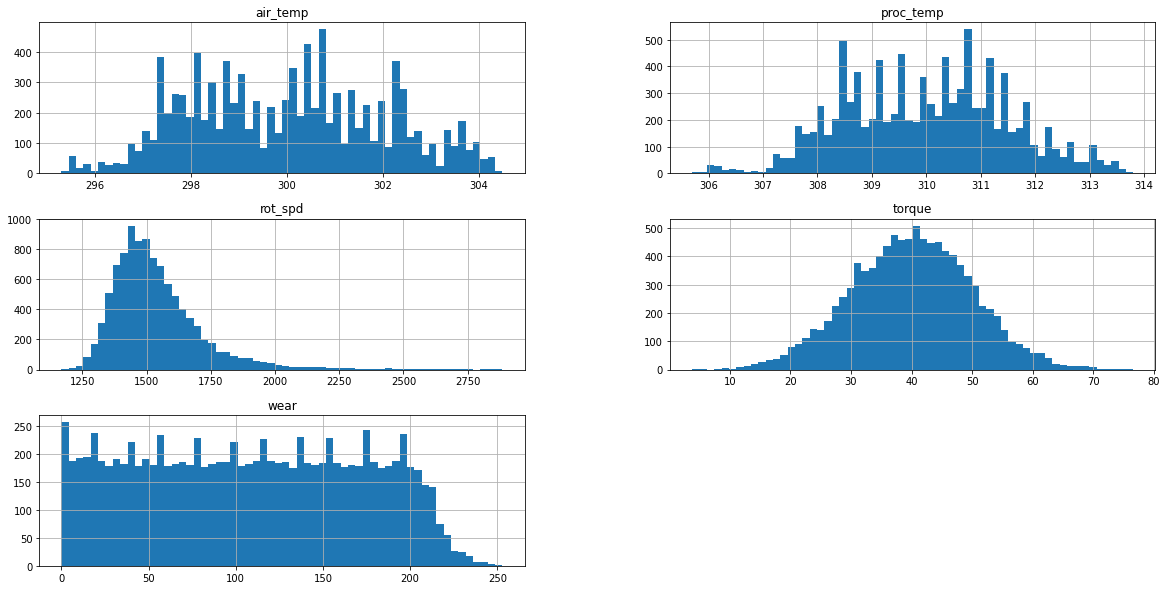

In [ ]:
df_pred_data.hist(bins=60, figsize = (20,10))
# There may be some outliers on rot_spd data (above 2000)

In [ ]:
df.columns

Index(['id', 'product', 'quality', 'air_temp', 'proc_temp', 'rot_spd',
       'torque', 'wear', 'target', 'fail_type'],
      dtype='object')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
sns.set(rc = {'figure.figsize':(20,8)})

In [ ]:
reset_dataframe()

In [ ]:
df_rot_spd = df.drop(columns=['UDI','Type','Product ID','Air temperature [K]','Torque [Nm]','Tool wear [min]','Process temperature [K]'])

In [ ]:
names = {'Air temperature [K]':'air_temp','Process temperature [K]':'proc_temp','Rotational speed [rpm]':'rot_spd','Torque [Nm]':'torque','Tool wear [min]':'wear'}
df_rot_spd.rename(columns = names,inplace = True)

In [ ]:
df_rot_spd.columns

Index(['rot_spd', 'Target', 'Failure Type'], dtype='object')

In [ ]:
df_rot_spd_failure = df_rot_spd[df_rot_spd['Target'] == 1]

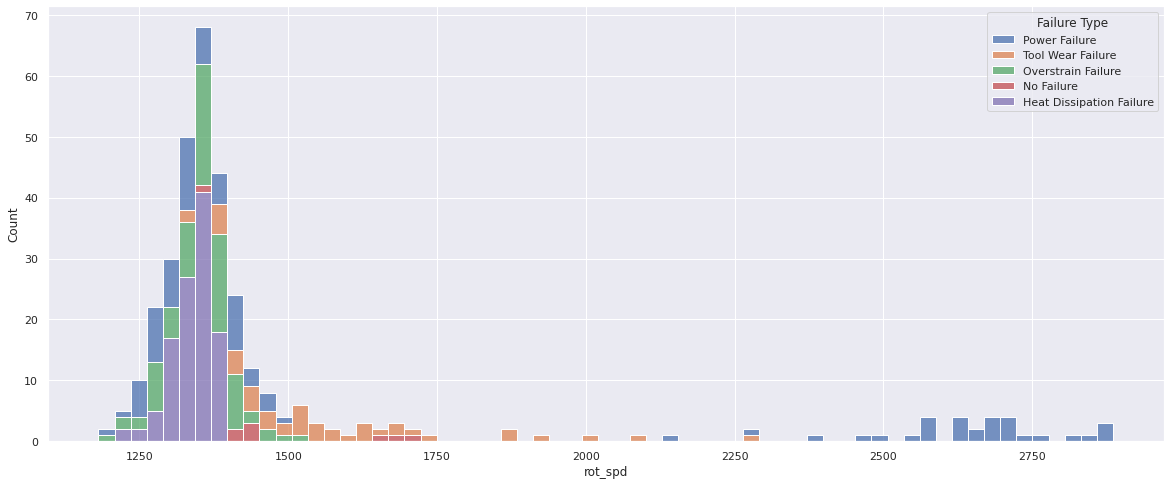

In [ ]:
sns.histplot(df_rot_spd_failure,
             x = 'rot_spd',
             hue = 'Failure Type',
             multiple = 'stack',
             )

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f68afacdfd0>,
      dtype=object)

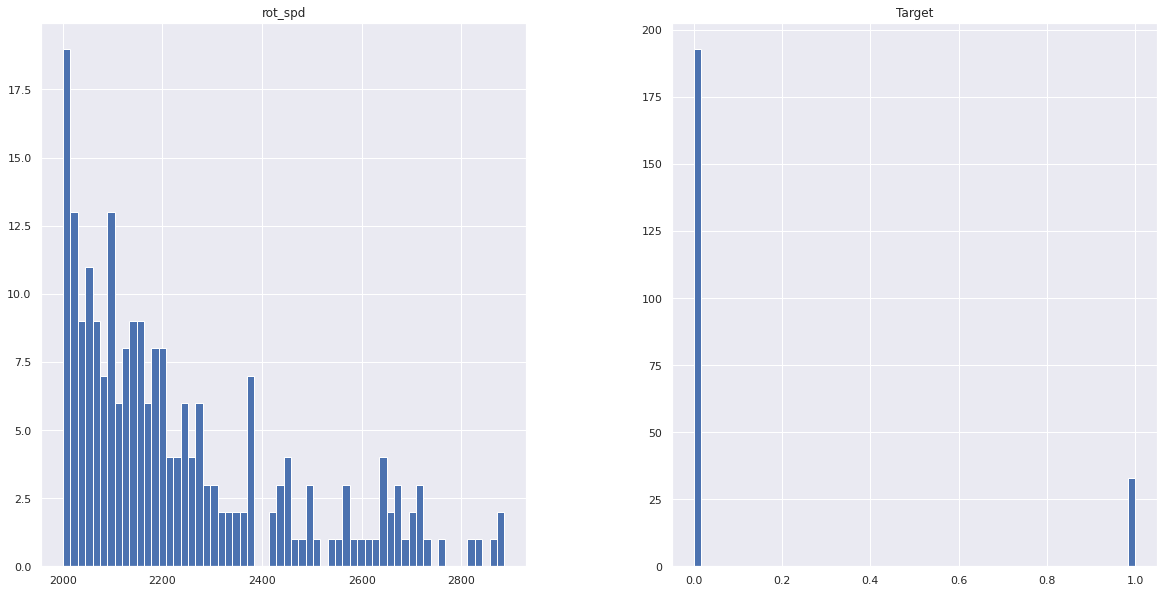

In [ ]:
sub_rot_spd = df_rot_spd[df_rot_spd['rot_spd'] > 2000]
sub_rot_spd.hist(bins=60, figsize = (20,10))

In [ ]:
# In the plot above we can see some correlation between "Heat Dissipation Failure" and "Overstrain failure" and rot_spd

In [ ]:
reset_dataframe()

In [ ]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
df_pred_data = df.drop(columns=['UDI','Type','Product ID'])

In [ ]:
names = {'Air temperature [K]':'air_temp','Process temperature [K]':'proc_temp','Rotational speed [rpm]':'rot_spd','Torque [Nm]':'torque','Tool wear [min]':'wear','Target':'target','Failure Type':'fail_type'}
df_pred_data.rename(columns = names,inplace = True)

In [ ]:
df_pred_data.columns

Index(['air_temp', 'proc_temp', 'rot_spd', 'torque', 'wear', 'target',
       'fail_type'],
      dtype='object')

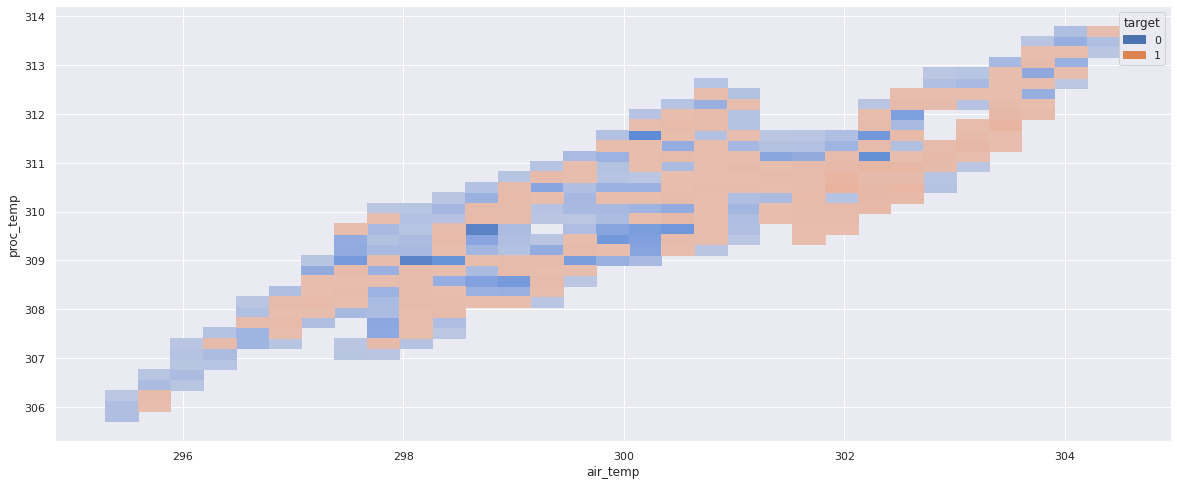

In [ ]:
sns.histplot(df_pred_data,
             x = 'air_temp',
             y = 'proc_temp',
             hue = 'target',
             )

In [ ]:
rename_dataframe()

In [ ]:
df.columns

Index(['id', 'product', 'quality', 'air_temp', 'proc_temp', 'rot_spd',
       'torque', 'wear', 'target', 'fail_type'],
      dtype='object')

In [ ]:
df['target'].value_counts()

0    9661
1     339
Name: target, dtype: int64

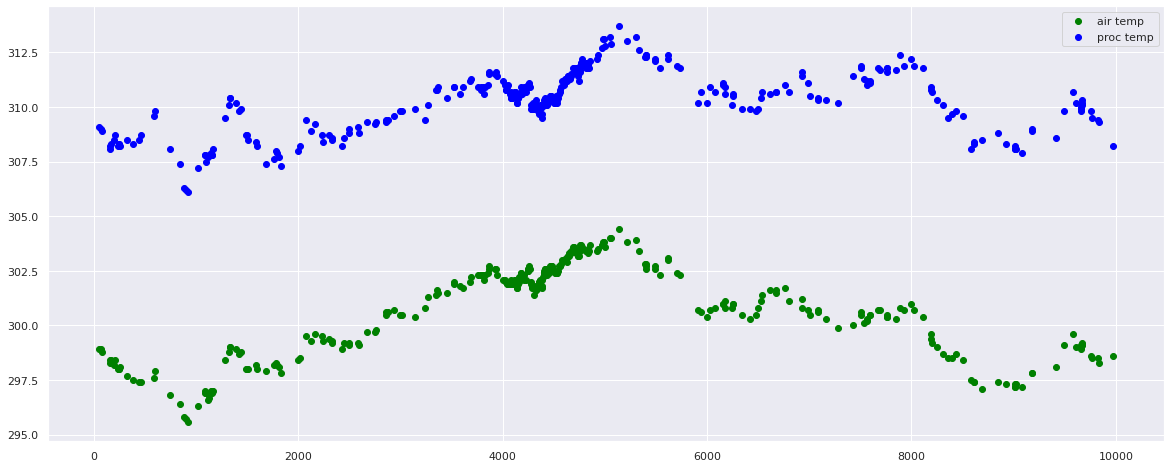

In [ ]:
df = df[df['target'] == 1]
x = df['id']
y1 = df['air_temp']
y2 = df['proc_temp']


plt.scatter(x, y1, label = 'air temp', c = 'green')
plt.scatter(x, y2, label = 'proc temp',  c = 'blue')
plt.legend()
plt.show()

## Categorical Values check

In [ ]:
reset_dataframe()

In [ ]:
rename_dataframe()

In [ ]:
df.columns

Index(['id', 'product', 'quality', 'air_temp', 'proc_temp', 'rot_spd',
       'torque', 'wear', 'target', 'fail_type'],
      dtype='object')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f68ad7e3150>],
      dtype=object)

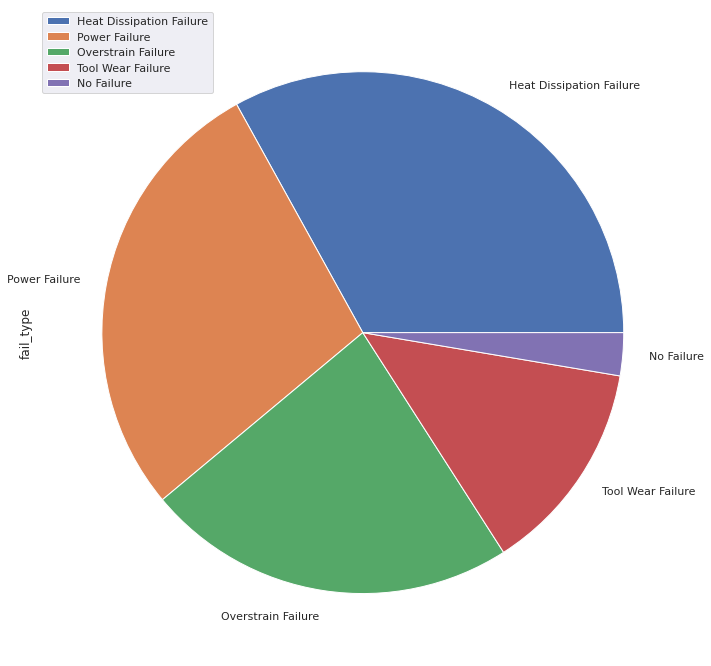

In [ ]:
subdf_failed = df[df['target'] == 1]
pd.DataFrame(subdf_failed['fail_type'].value_counts()).plot(kind = 'pie', subplots=True, figsize = (25,12))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         10000 non-null  int64  
 1   product    10000 non-null  object 
 2   quality    10000 non-null  object 
 3   air_temp   10000 non-null  float64
 4   proc_temp  10000 non-null  float64
 5   rot_spd    10000 non-null  int64  
 6   torque     10000 non-null  float64
 7   wear       10000 non-null  int64  
 8   target     10000 non-null  int64  
 9   fail_type  10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


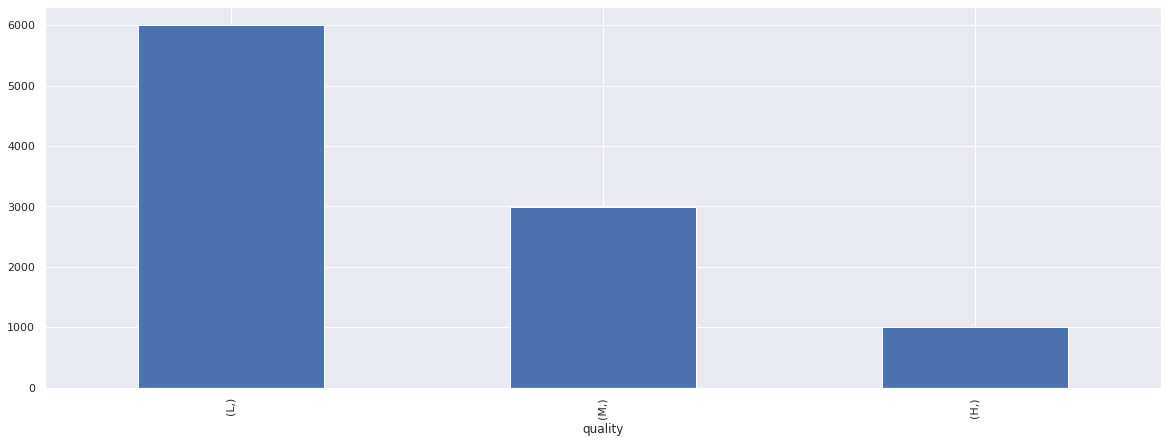

In [ ]:
pd.DataFrame(df['quality']).value_counts().plot(kind = 'bar', figsize = (20,7))

In [ ]:
subdf_failed

id product quality  air_temp  ...  torque  wear  target           fail_type
50      51  L47230       L     298.9  ...     4.6   143       1       Power Failure
69      70  L47249       L     298.9  ...    65.7   191       1       Power Failure
77      78  L47257       L     298.8  ...    41.3   208       1   Tool Wear Failure
160    161  L47340       L     298.4  ...    60.7   216       1  Overstrain Failure
161    162  L47341       L     298.3  ...    52.3   218       1  Overstrain Failure
...    ...     ...     ...       ...  ...     ...   ...     ...                 ...
9758  9759  L56938       L     298.6  ...    16.2   218       1   Tool Wear Failure
9764  9765  L56944       L     298.5  ...    66.7    12       1       Power Failure
9822  9823  L57002       L     298.5  ...    60.9   187       1  Overstrain Failure
9830  9831  L57010       L     298.3  ...    56.1   206       1  Overstrain Failure
9974  9975  L57154       L     298.6  ...    68.2   172       1       Power Failure

[339 rows x 10 columns]

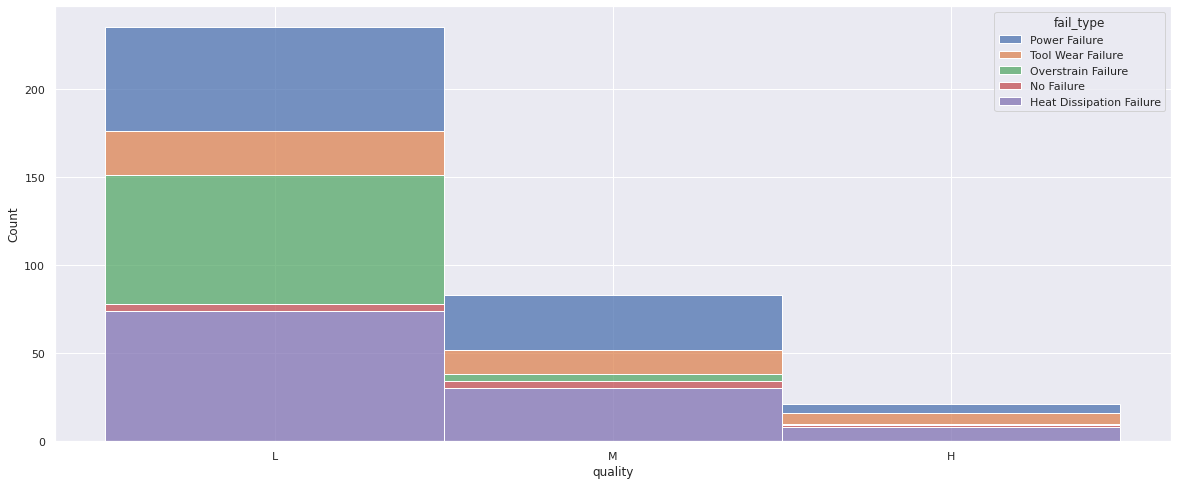

In [ ]:
sns.histplot(subdf_failed,
             x = 'quality',
             hue = 'fail_type',
             multiple = 'stack',
             )

## Correlation Analysis

In [ ]:
reset_dataframe()

In [ ]:
rename_dataframe()

In [ ]:
drop_columns()

In [ ]:
df.columns

Index(['quality', 'air_temp', 'proc_temp', 'rot_spd', 'torque', 'wear',
       'target', 'fail_type'],
      dtype='object')

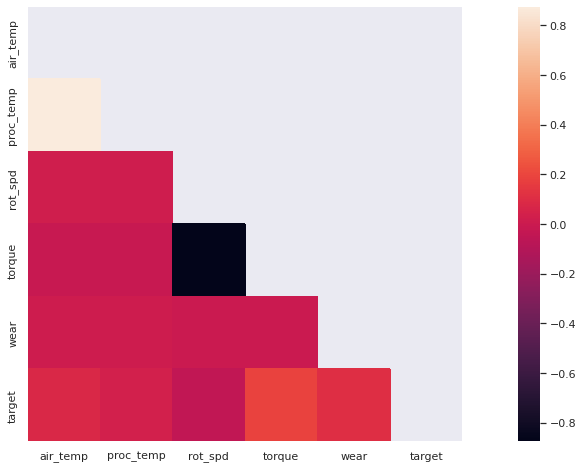

In [ ]:
corr_df = df.drop(columns = ['quality','fail_type']).corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, mask = mask, square = True)

# Logistic Regression (Scikit-lean)

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable.<br> The most common logistic regression models a binary outcome; <br>something that can take two values such as true/false, yes/no, and so on.
<br><br>
https://www.sciencedirect.com/topics/computer-science/logistic-regression#:~:text=Logistic%20regression%20is%20a%20process,outcome%20given%20an%20input%20variable.&text=Logistic%20regression%20is%20a%20useful,fits%20best%20into%20a%20category.

All the theory used on the following analysis were extracted from this paper:
<br><br>
**Logistic Regression using Python (scikit-learn)**
<br>
https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a

In [ ]:
# preparing the dataset
reset_dataframe()
rename_dataframe()
drop_columns()

In [ ]:
df = df.drop(columns = ['fail_type','quality'])

In [ ]:
df

air_temp  proc_temp  rot_spd  torque  wear  target
0        298.1      308.6     1551    42.8     0       0
1        298.2      308.7     1408    46.3     3       0
2        298.1      308.5     1498    49.4     5       0
3        298.2      308.6     1433    39.5     7       0
4        298.2      308.7     1408    40.0     9       0
...        ...        ...      ...     ...   ...     ...
9995     298.8      308.4     1604    29.5    14       0
9996     298.9      308.4     1632    31.8    17       0
9997     299.0      308.6     1645    33.4    22       0
9998     299.0      308.7     1408    48.5    25       0
9999     299.0      308.7     1500    40.2    30       0

[10000 rows x 6 columns]

## Splitting Data into Training and Test Sets

We make training and test sets to make sure that after we train our classification algorithm, it is able to generalize well to new data.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns = ['target'], axis = 1),
                                                    df['target'], test_size=0.25, random_state=0)

In [ ]:
# using solver "lbfgs" but there are other such as "saga", "newton-cg", "lilinear","sag"...
LogReg = LogisticRegression(solver='lbfgs')
LogReg.fit(x_train, y_train)

time_model = execution_time()

In [ ]:
LogReg.predict(np.array([[298.9,309.1,2861,4.6,0]]))[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


0

In [ ]:
predictions = LogReg.predict(x_test)

## Model Performance

Models of measuring model performance:
<br>
<ul>
  <li>F1 Score</li>
  <li>ROC Curve</li>
  <li>Precision</li>
  <li>recall</li>

### Score

In [ ]:
score = LogReg.score(x_test, y_test)
print(score)

0.9668


### Confusion Matrix

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
# elabroating the confusion matrix without any interface
cm = confusion_matrix(y_test, predictions)

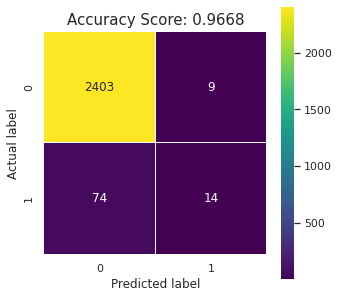

In [ ]:
# plotting the confusion matrix from the classifier (Failure vs Not Failure)
plt.figure(figsize = (5,5))
sns.heatmap(cm, annot = True, 
            fmt = ".0f", 
            linewidths = .5, 
            square = True,
            cmap = 'viridis');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

# Principal Component Analysis (PCA)

PCA is a commom way of speeding up a machine learning algorithm.
<br>
When you can use it:
<li>Input dimension is too large
<li>Data visualization</li>
<br><br>
All the theory behind the following analysis is based on:
<br>
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

PCA is effected by scale so you need to scale the features in your data before applying PCA. 
<br>
Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.
<br>
 If you want to see the negative effect not scaling your data can have, scikit-learn has a section on the effects of not standardizing your data.

## Standardization of the values

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df.columns

Index(['air_temp', 'proc_temp', 'rot_spd', 'torque', 'wear', 'target'], dtype='object')

In [ ]:
reset_dataframe()
rename_dataframe()
drop_columns()
# df = df.drop(columns=['quality','fail_type'])
df = df.drop(columns = ['target','quality','fail_type'])

In [ ]:
features = list(df.columns)
list(df.columns)

['air_temp', 'proc_temp', 'rot_spd', 'torque', 'wear']

In [ ]:
# separating out the features
x = df.loc[:, features].values

In [ ]:
reset_dataframe()
rename_dataframe()
drop_columns()
# df = df.drop(columns=['quality','fail_type'])

In [ ]:
# separating out the target
y = df.loc[:, ['target']].values

In [ ]:
# standardizing the features
x = StandardScaler().fit_transform(x)

## PCA Projected to 2D

In [ ]:
# the original data has 6  columns
x.shape

(10000, 5)

In [ ]:
# after this dimensionality reduction, there usually isn't a particular meaning assigned to each principal component
# The new components are just the two main dimensions of variation
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

principal_components = pca.fit_transform(x)

principal_df = pd.DataFrame(data = principal_components,
                           columns = ['principal component 1','principal component 2'])

In [ ]:
# transforming the original standardized data in order to compare with the dimensionally reduced dataframe
x_df = pd.DataFrame(data = x,
                    columns = features)
x_df.head()

air_temp  proc_temp   rot_spd    torque      wear
0 -0.952389  -0.947360  0.068185  0.282200 -1.695984
1 -0.902393  -0.879959 -0.729472  0.633308 -1.648852
2 -0.952389  -1.014761 -0.227450  0.944290 -1.617430
3 -0.902393  -0.947360 -0.590021 -0.048845 -1.586009
4 -0.902393  -0.879959 -0.729472  0.001313 -1.554588

In [ ]:
# standardized and reduced in dimension data
principal_df.head()

principal component 1  principal component 2
0              -1.093847               0.854210
1              -1.602678               0.215765
2              -1.599406               0.401641
3              -1.230438               0.664604
4              -1.289814               0.535153

In [ ]:
# transforming the y (numpy.ndarray) in a dataframe in order to join with all standardized data x_df
y_df = pd.DataFrame (data = y, columns = ['target'])
y_df

target
0          0
1          0
2          0
3          0
4          0
...      ...
9995       0
9996       0
9997       0
9998       0
9999       0

[10000 rows x 1 columns]

In [ ]:
# joining input data with target data, all of them standardized
partial_final_df = x_df.join(principal_df)
final_df = partial_final_df.join(y_df)
final_df

air_temp  proc_temp  ...  principal component 2  target
0    -0.952389  -0.947360  ...               0.854210       0
1    -0.902393  -0.879959  ...               0.215765       0
2    -0.952389  -1.014761  ...               0.401641       0
3    -0.902393  -0.947360  ...               0.664604       0
4    -0.902393  -0.879959  ...               0.535153       0
...        ...        ...  ...                    ...     ...
9995 -0.602417  -1.082162  ...               1.570849       0
9996 -0.552421  -1.082162  ...               1.507031       0
9997 -0.502425  -0.947360  ...               1.369578       0
9998 -0.502425  -0.879959  ...              -0.098655       0
9999 -0.502425  -0.879959  ...               0.581113       0

[10000 rows x 8 columns]

## Visualize 2D projection

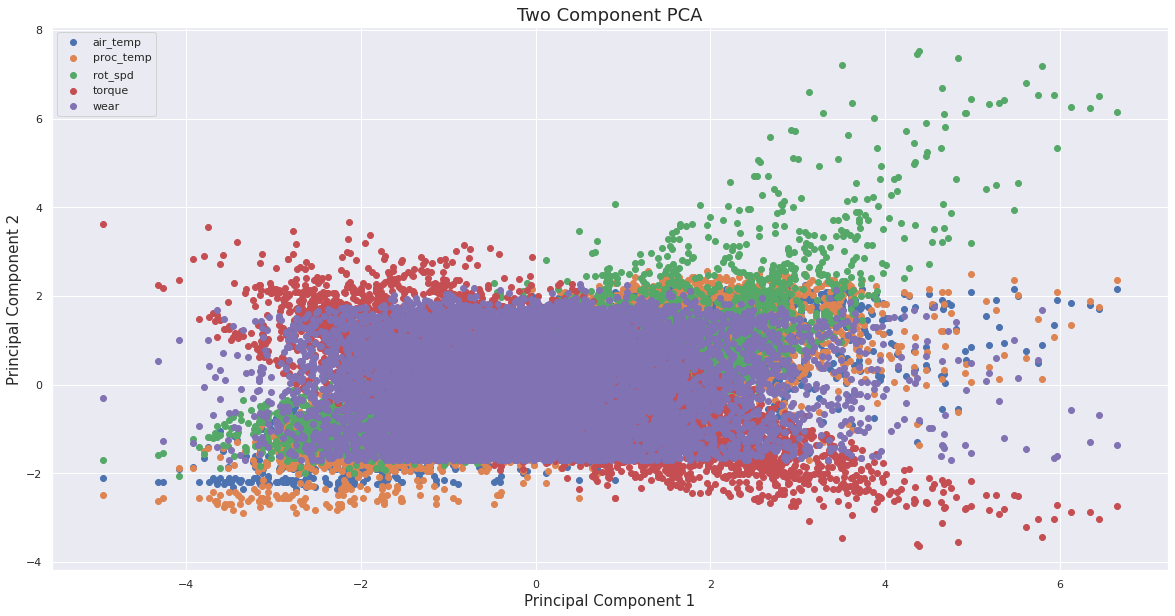

In [ ]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Two Component PCA', fontsize = 18)

targets = ['air_temp', 'proc_temp', 'rot_spd', 'torque', 'wear']
colors = ['r','g','b','c','k']
x = final_df['principal component 1']

for target, color in zip(targets, colors):
  plt.scatter(x, final_df[target], label = target)

plt.legend()
plt.show()

In [ ]:
pca.explained_variance_ratio_

array([0.3821481 , 0.36817048])

# Logistic Regression - Standardized Data

In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)

StandardScaler()

In [ ]:
# standardizing the data 
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [ ]:
# creating the model
LogReg = LogisticRegression(solver='lbfgs')
model = LogReg.fit(x_train_std, y_train)
time_model_std = execution_time()

In [ ]:
# Predict for One Observation
# LogReg.predict(x_test_std[0].reshape(1,-1))[0]
LogReg.predict(np.array([[298.9,309.1,2861,4.6,0]]))[0]

1

In [ ]:
# making predictions for all the test subset
predictions = LogReg.predict(x_test_std)

In [ ]:
# measuring score
score_std = LogReg.score(x_test_std, y_test)
score_std

0.9672

In [ ]:
# difference between original model and standardized:
dif_score = score_std - score
print(f'differente in score: {dif_score*100:.2f}%')
print(f'differente in exec time: {time_model_std - time_model}s')

differente in score: 0.04%
differente in exec time: -2.699999868127634e-07s


# Classification Models



A classification model is necessary in order to determine which failure will happen in each case, not only determining if the machine will fail.

Some classification algorithms:

* Decision Tree
* Naive Bayes Classifier
* K-Nearest Neighbors
* Support Vector Machines
* Artificial Neural Networks


## Decision Tree algorithm

For the desicion tree, there are a few algorithms possible, but the ones issued here are:
* CART (Classification and Regression trees)
 * use Gini Index (Classification) as metric
* ID3 (Iterative Dichotomiser 3)
 * uses Entropy function and information gain as metrics

**Pros**


1. Decision trees are easy to interpret and visualize.
2. It can easily capture Non-linear patterns.
3. It requires fewer data preprocessing from the user, for example, there is no need to normalize columns.
4. It can be used for feature engineering such as predicting missing values, suitable for variable selection.
5. The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.



https://www.datacamp.com/community/tutorials/decision-tree-classification-python

### ID3 Algorithm

* Nodes are features/attributes

In [ ]:
df = df.drop(columns=['target'])
df.columns

Index(['quality', 'air_temp', 'proc_temp', 'rot_spd', 'torque', 'wear',
       'fail_type'],
      dtype='object')

Here the attributes are the following:<bR>
1. quality
2. air_temp
3. proc_temp
4. rot_spd
5. torque
6. wear

The outcome is:
1. fail_type

How to choose the best attribute (to be the root node).
- use the attribute with the highest information gain in ID3

Steps:
1. compute the entropy for data-set
2. for every attribute/feature:
  1. calculate entropy for all categorical values
  2. take average information entropy for the current attribute
3. calculate gain for the current attribute
3. pick the highest gain attribute.
4. Repeat until we get the tree we desired.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split #(already imported)
from sklearn import metrics

In [ ]:
reset_dataframe()
rename_dataframe()
drop_columns()
df = df.drop(columns = ['quality','target','fail_type'])

In [ ]:
# feature selection
x = df[df.columns]

reset_dataframe()
rename_dataframe()
drop_columns()
df = df.drop(columns = ['quality','target'])
df['fail_type'] = df['fail_type'].replace(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'],[0, 1, 2, 3, 4, 5])

y = df['fail_type']

In [ ]:
x

air_temp  proc_temp  rot_spd  torque  wear
0        298.1      308.6     1551    42.8     0
1        298.2      308.7     1408    46.3     3
2        298.1      308.5     1498    49.4     5
3        298.2      308.6     1433    39.5     7
4        298.2      308.7     1408    40.0     9
...        ...        ...      ...     ...   ...
9995     298.8      308.4     1604    29.5    14
9996     298.9      308.4     1632    31.8    17
9997     299.0      308.6     1645    33.4    22
9998     299.0      308.7     1408    48.5    25
9999     299.0      308.7     1500    40.2    30

[10000 rows x 5 columns]

In [ ]:
y = pd.DataFrame(data = y)
y.value_counts()

fail_type
0            9652
5             112
1              95
3              78
2              45
4              18
dtype: int64

In [ ]:
# splitting the data (training and test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1) # 70% training and 30% test

#### Building the Decision Tree model

In [ ]:
# create decision tree classifier object
clf = DecisionTreeClassifier()

In [ ]:
# train decision tree classifier
clf = clf.fit(x_train, y_train)

In [ ]:
# predict the reponse for test dataset
y_pred = clf.predict(x_test)

#### Evaluating the Model

In [ ]:
print("Accuracy: ", metrics.accuracy_score(y_test,y_pred))

Accuracy:  0.975


#### Visualizing Decision Tress

In [ ]:
!pip install graphviz

In [ ]:
!pip install pydotplus

In [ ]:
from graphviz import Source
from sklearn import tree

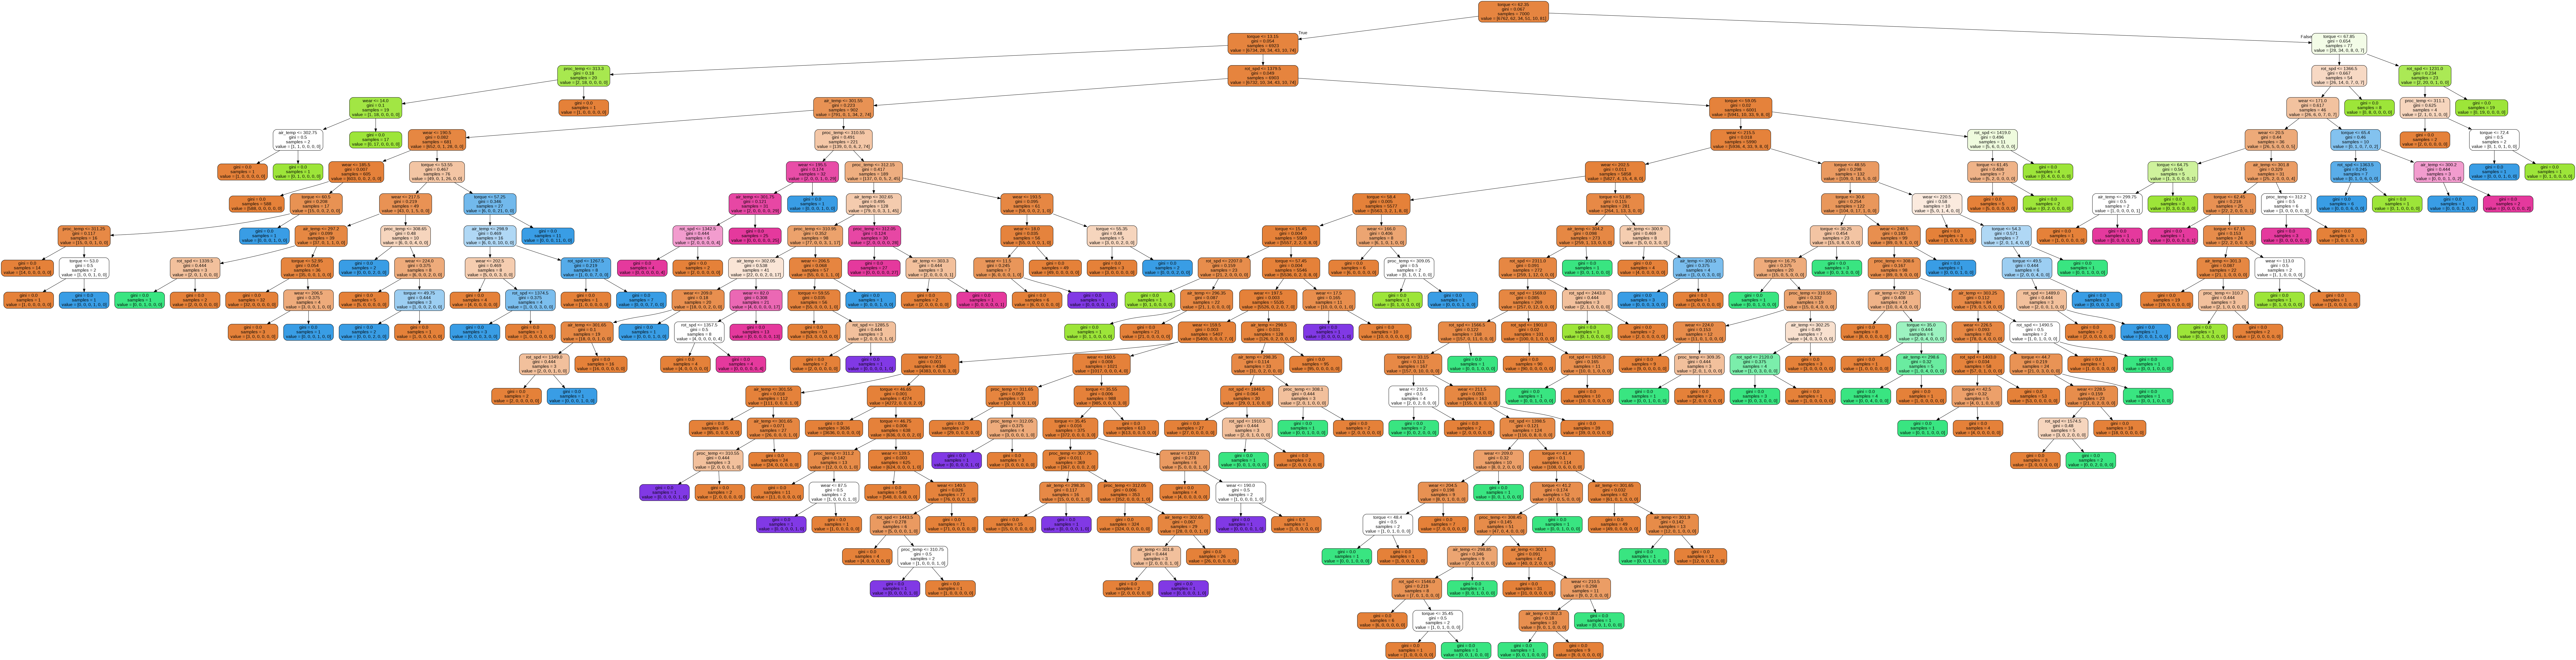

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None, filled = True, rounded = True, feature_names=x.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)

The decision tree chart resultant is unpruned, and it is not easily explained. Therefore, we'll proceed by pruning it.

#### Optimizing Decision Tree Performance

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. 
<br>
Maximum depth of the tree can be used as a control variable for pre-pruning. <br>In the following the example, you can plot a decision tree on the same data with max_depth=3. 
<br>Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [ ]:
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

In [ ]:
clf = clf.fit(x_train,y_train)

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9636666666666667


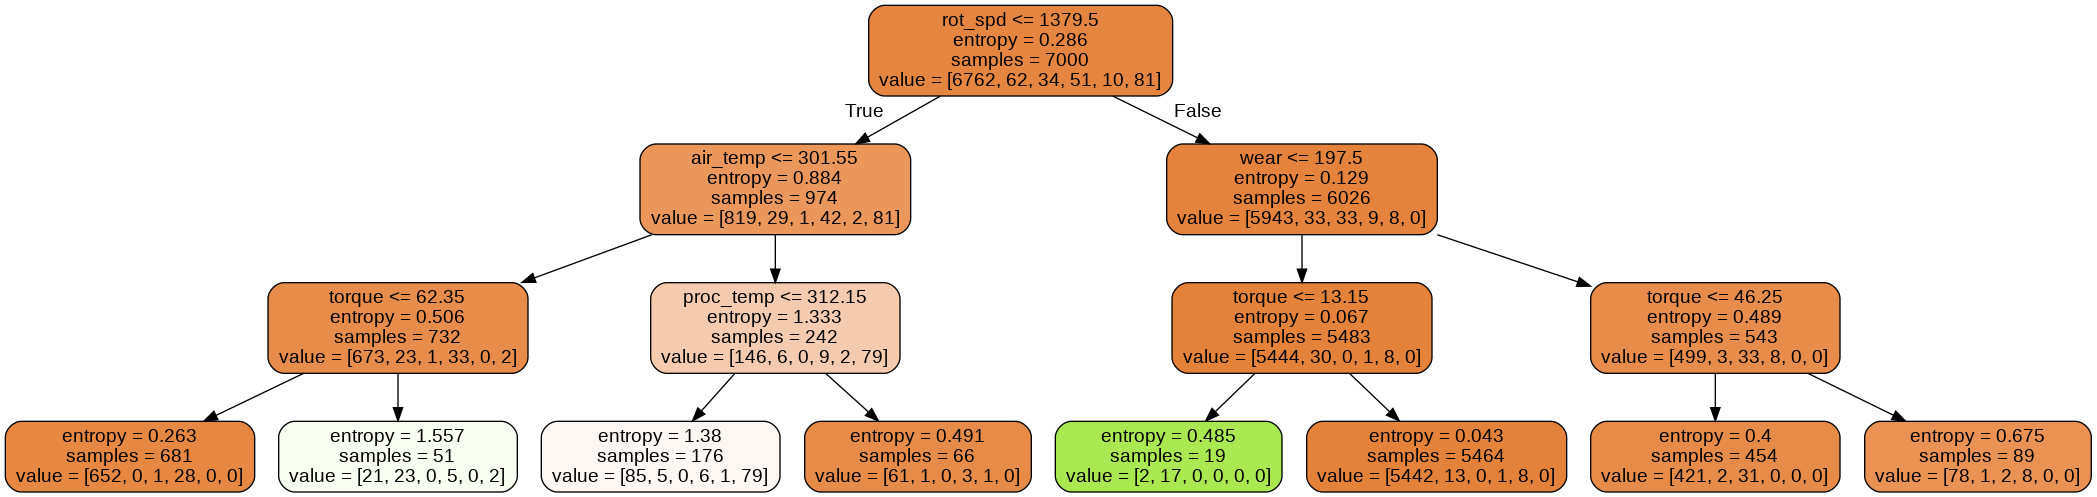

In [ ]:
graph = Source(tree.export_graphviz(clf, out_file=None, filled = True, rounded = True, feature_names=x.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_pipe.png','wb') as f:
    f.write(png_bytes)

from IPython.display import Image
Image(png_bytes)